# Avocado Project
### Problem Statement:  
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation  
AveragePrice - the average price of a single avocado   
type - conventional or organic   
year - the year   
Region - the city or region of the observation  
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold        
4225 - Total number of avocados with PLU 4225 sold      
4770 - Total number of avocados with PLU 4770 sold        


In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are 18249 rows and 14 columns are present in the data. Let's explore the data

# Exploratory Data Analysis (EDA)

In [3]:
df.head(7)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany


In [4]:
# Let remove the Unnamed:0 column
    
df=df.drop(columns='Unnamed: 0',axis=1)

In [5]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
234,2015-06-28,1.25,560494.92,4688.28,403230.60,9120.30,143455.74,142574.63,881.11,0.00,conventional,2015,Boston
82,2015-05-31,1.10,454702.00,382900.99,19543.18,522.81,51735.02,40505.16,11199.95,29.91,conventional,2015,Atlanta
2140,2015-11-01,1.01,468472.81,211287.89,179995.77,17716.68,59472.47,53567.27,5897.02,8.18,conventional,2015,SanDiego
10069,2015-11-08,1.44,10027.49,6028.94,83.94,0.00,3914.61,3914.61,0.00,0.00,organic,2015,Houston
16217,2017-02-19,1.33,5160.37,139.21,0.00,0.00,5021.16,4830.72,190.44,0.00,organic,2017,NewOrleansMobile


In [6]:
df.tail(7)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
#Checking the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
#Checking the data types of each columns
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Date, Type, Region are Object data type, year is integer data type and the rest all float data type. It is showing the Date is object. Let's convert it to Data Time data type

In [9]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtypes

dtype('<M8[ns]')

In [10]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [11]:
#Extracting only Month from Date Column
df['Months']=df['Date'].dt.month
print(df['Months'])

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Months, Length: 18249, dtype: int64


In [12]:
#Extracting Day from Date Column
df['Day']=df['Date'].dt.day
print(df['Day'])

0        27
1        20
2        13
3         6
4        29
         ..
18244     4
18245    28
18246    21
18247    14
18248     7
Name: Day, Length: 18249, dtype: int64


In [13]:
#Extracting Year from Date Column
df['Year']=df['Date'].dt.year
print(df['Year'])

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
18244    2018
18245    2018
18246    2018
18247    2018
18248    2018
Name: Year, Length: 18249, dtype: int64


In [14]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015


We see that there are 3  separate columns for Day, Month, Year

In [15]:
#Now we can drop the Date Column

df=df.drop(columns='Date',axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,2018


In [16]:
#Checking the unique value
df.nunique

<bound method DataFrame.nunique of        AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Ba

In [17]:
#Checking the shape of data
df.shape

(18249, 15)

In [18]:
#Checking the columns Name
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Months', 'Day', 'Year'],
      dtype='object')

In [19]:
# Checking the unique value of Average Price
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [20]:
#Checking the unique value of 4046
df['4046'].unique()

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

In [21]:
#Checking the unique value of 4225
df['4225'].unique()

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

In [22]:
#Checking the unique value of 4770
df['4770'].unique()

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

In [23]:
#Checking the unique value of Total Volumn
df['Total Volume'].unique()

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

In [24]:
#Checking the description of data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Months,Day,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000,2018.000000


In [25]:
#Checking the count of AveragePrice
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [26]:
#Checking the count of 4046
df['4046'].value_counts()

0.00         242
3.00          10
4.00           8
1.00           8
1.24           8
            ... 
3566.00        1
2154.42        1
128463.84      1
885.46         1
48461.43       1
Name: 4046, Length: 17702, dtype: int64

In [27]:
#Checking the count of Total Bags
df['Total Bags'].value_counts()

0.00         15
300.00        5
990.00        5
266.67        4
916.67        4
             ..
363283.69     1
3055.27       1
109148.95     1
458287.40     1
83660.42      1
Name: Total Bags, Length: 18097, dtype: int64

In [28]:
# Checking the Null Value

df.isnull()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Months          0
Day             0
Year            0
dtype: int64

As we see there is no null value present in the data

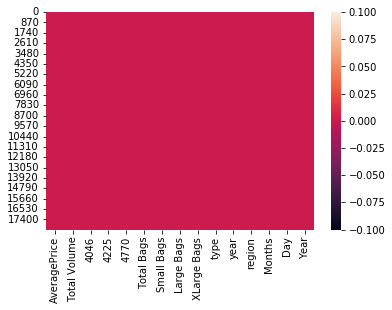

In [30]:
sns.heatmap(df.isnull())

# Correlation

In [31]:
#Checking the correlation

dfcorr=df.corr()
dfcorr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Months,Day,Year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,1.000000


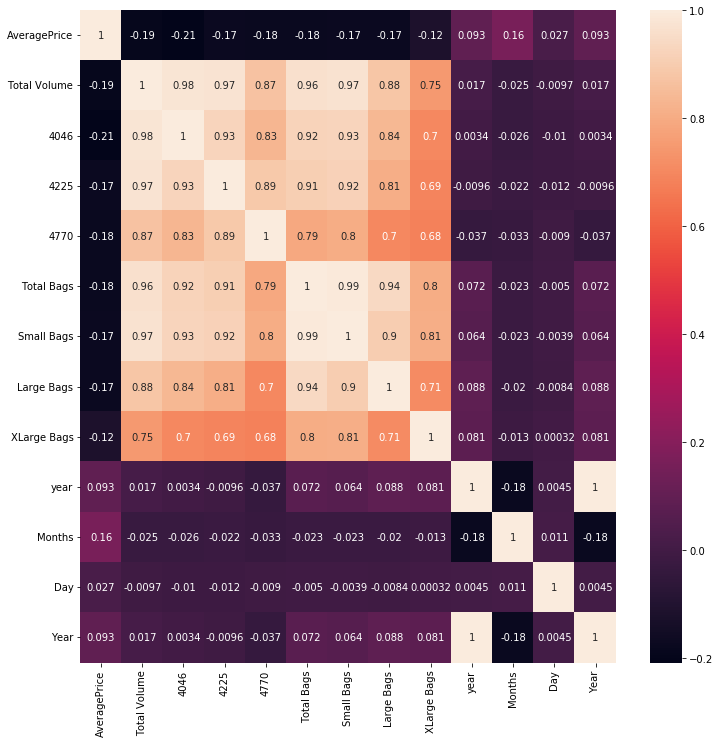

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(dfcorr,annot=True)

there are two type of data one is continuous data and another is categorical data. Let's split into two parts.

In [33]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015


In [34]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Months            int64
Day               int64
Year              int64
dtype: object

In [35]:
categorical_data=['type','region', 'Months','Day','Year']
continuous_data=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211DBA45248>,
      dtype=object)

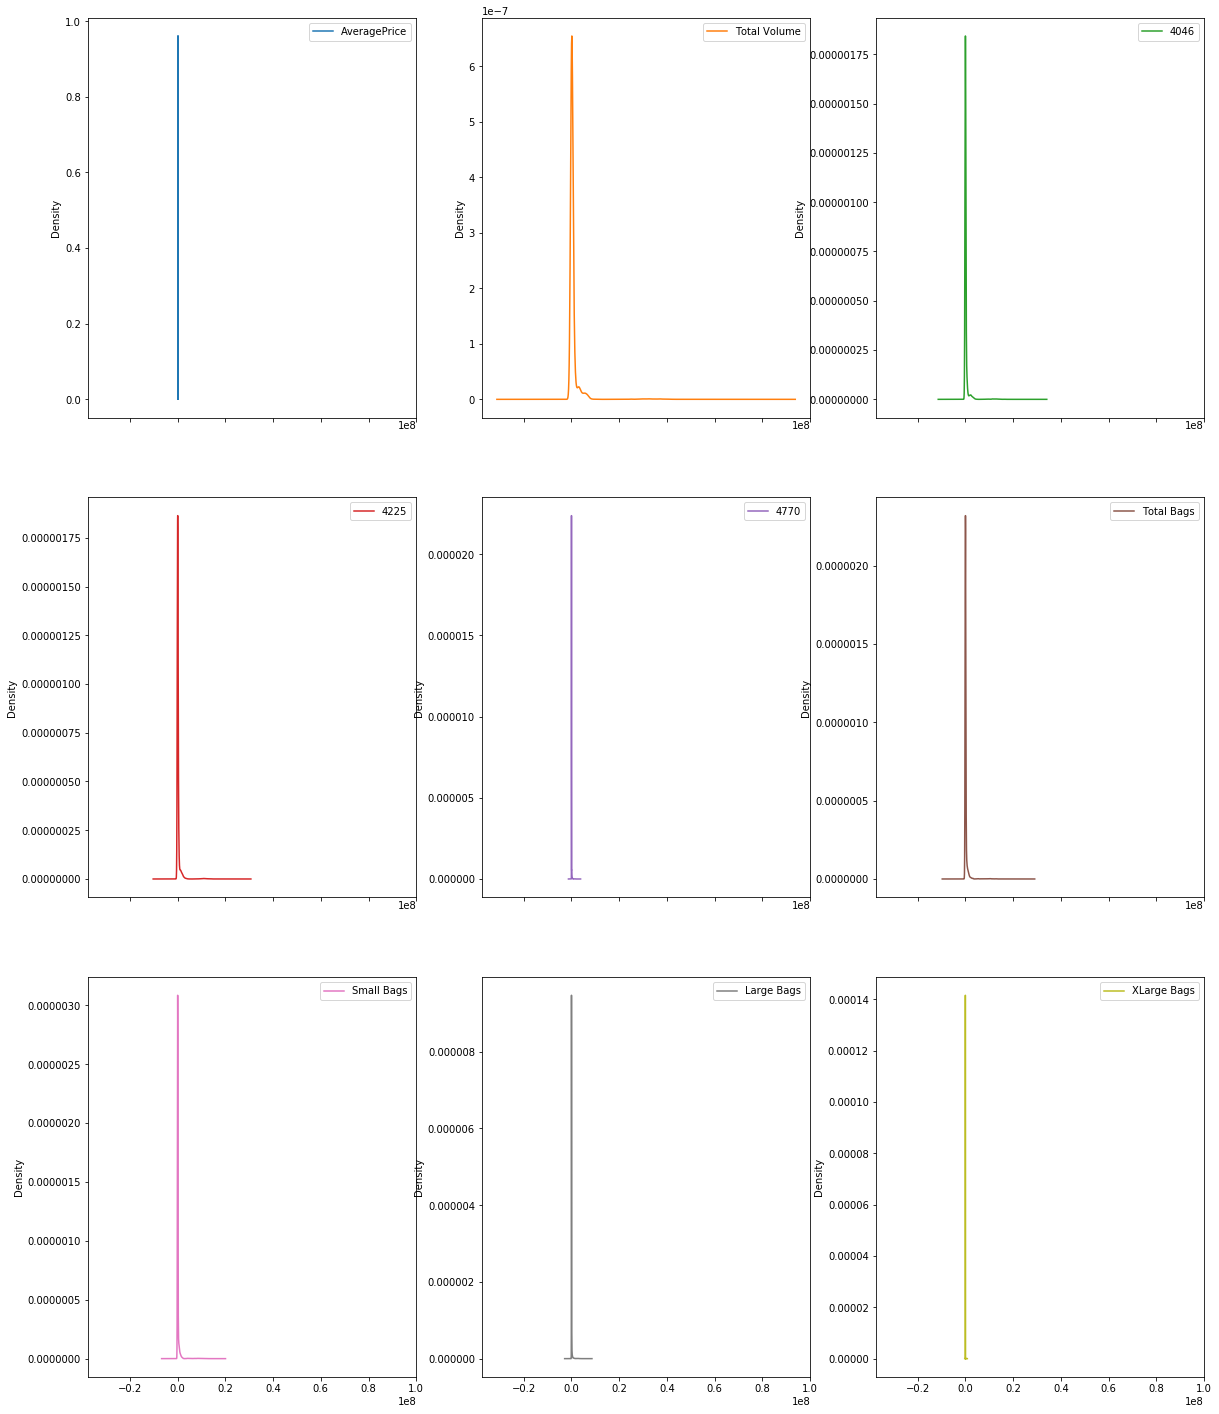

In [36]:
#Viewing the continuous data through kernel density estimator
df[continuous_data].plot(kind='kde',subplots=True,layout=(3,3),figsize=(20,25))

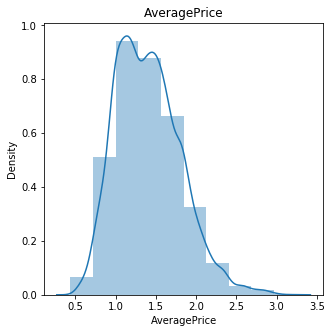

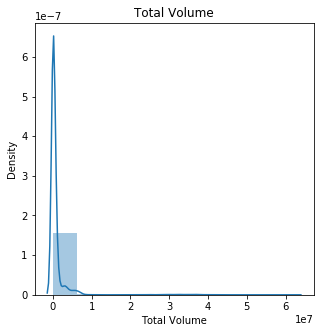

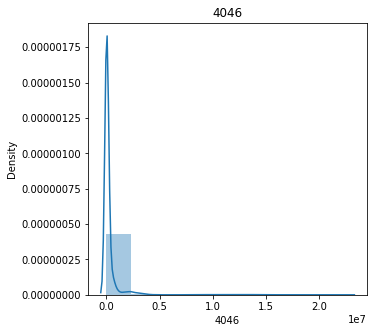

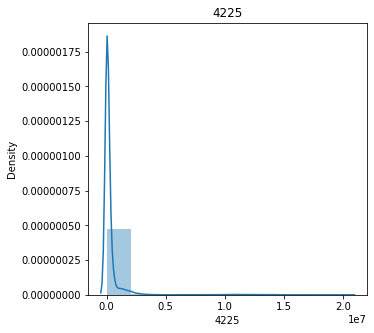

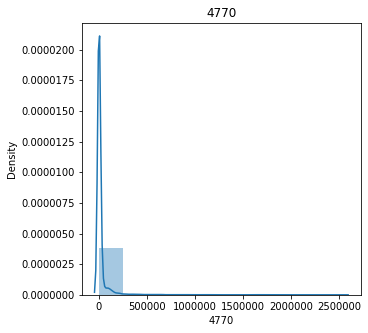

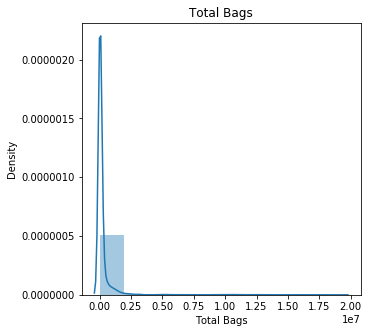

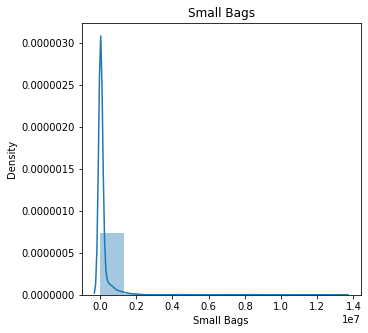

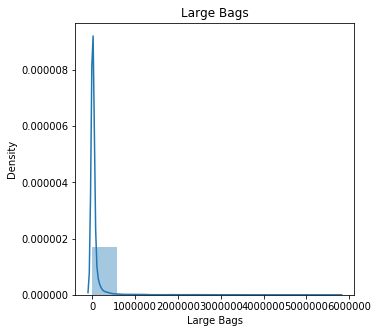

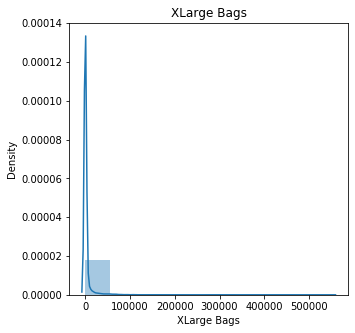

In [37]:
# Viewing the data through Distripution Plot
for i in df[continuous_data]:
    plt.figure(figsize=(5,5))
    sns.distplot(df[i],bins=10)
    plt.title(i)
    plt.show()

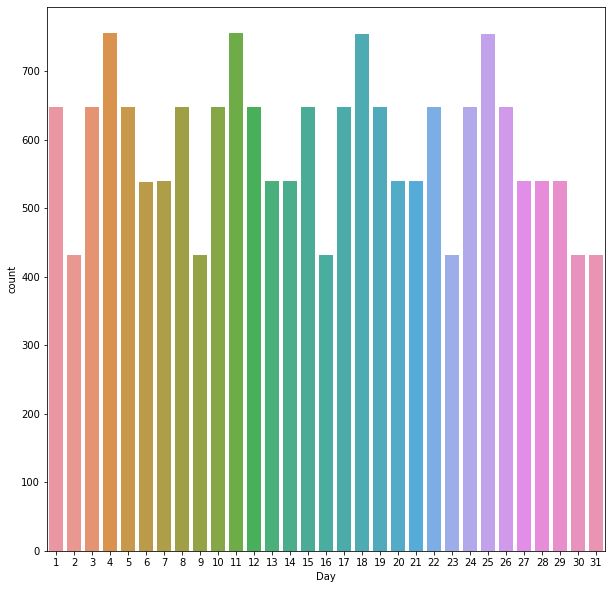

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(df['Day'])

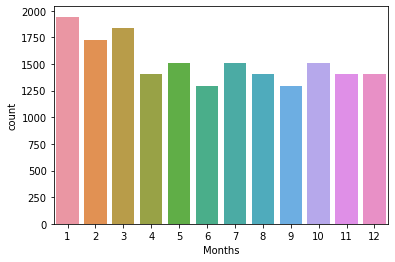

In [39]:
sns.countplot(df['Months'])

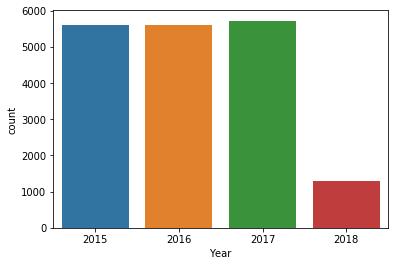

In [40]:
sns.countplot(df['Year'])

The sell of Avocado was high in the year of 2017. In 2018 the sell is too low. In 2015 and  2016 the sell is almost same.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

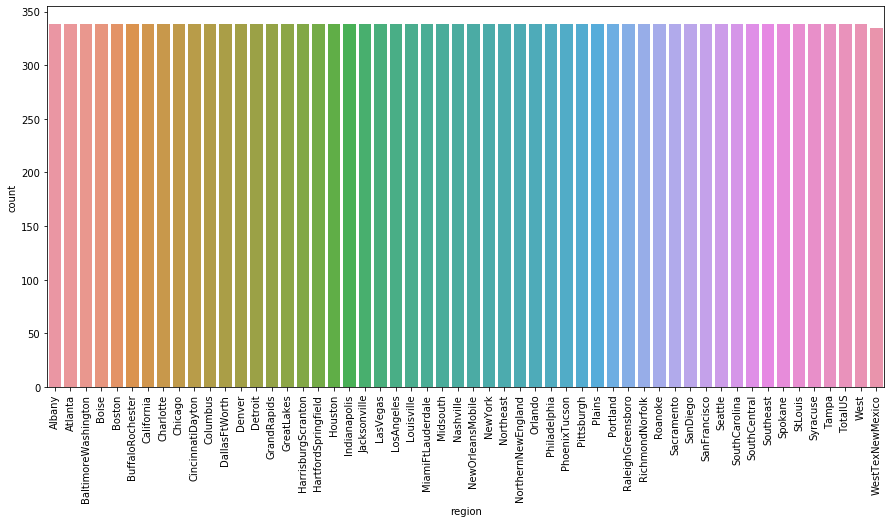

In [41]:
#Viewing the sell of each region through Count plot
plt.figure(figsize=(15,7))
sns.countplot(df['region'])
plt.xticks(rotation=90)

In [196]:
df['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

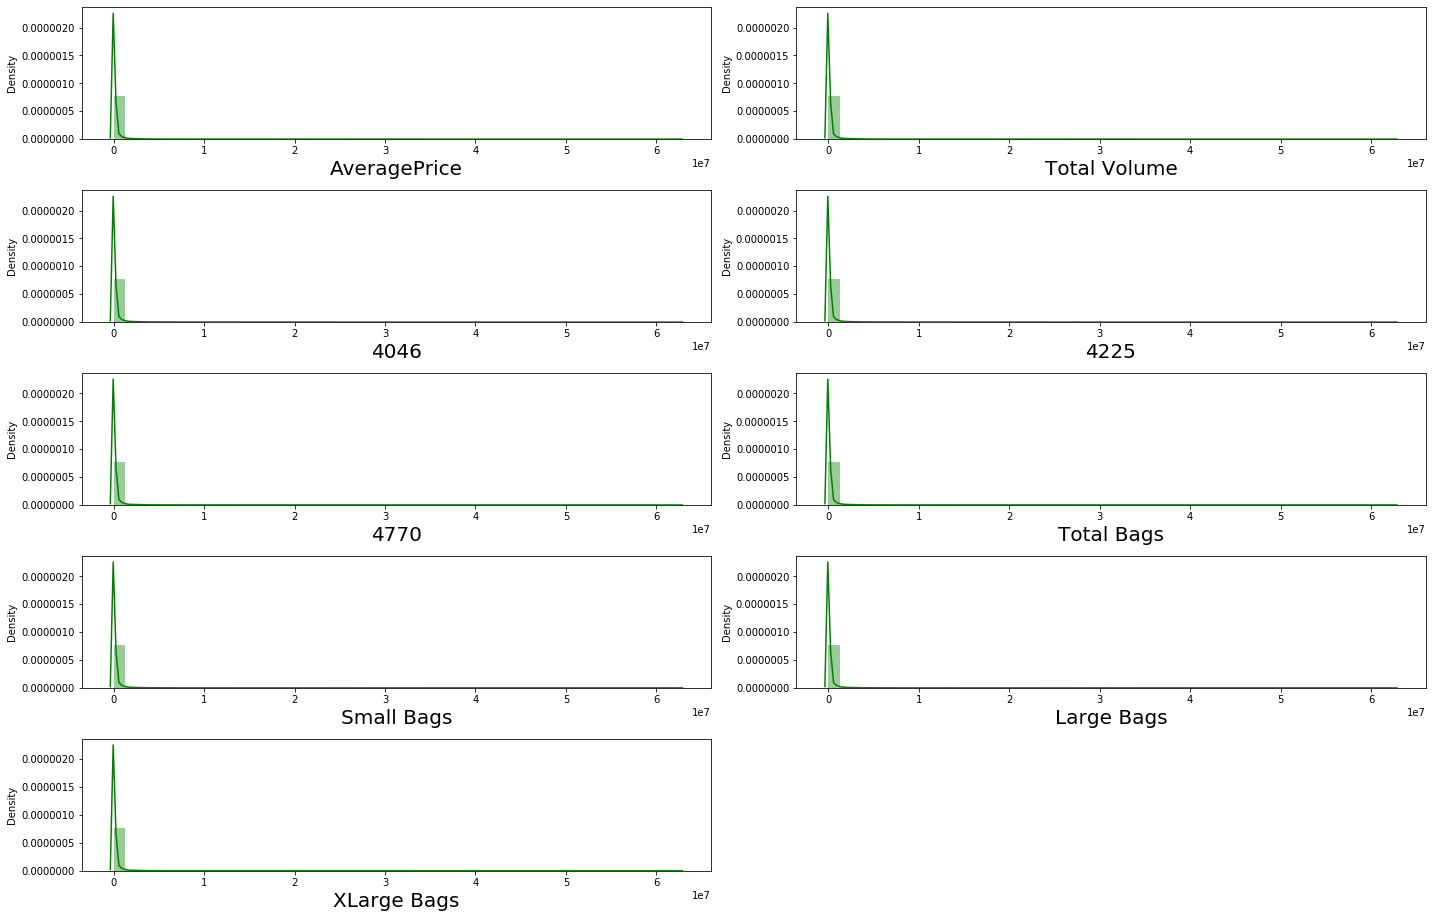

In [42]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df[continuous_data]:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(df[continuous_data],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

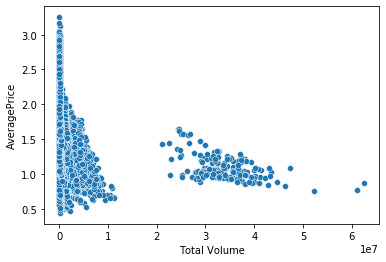

In [43]:
#Compare the Total Volumn and AveragePrice using Scatterplot
sns.scatterplot(df['Total Volume'],df['AveragePrice'])

In [44]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Months', 'Day', 'Year'],
      dtype='object')

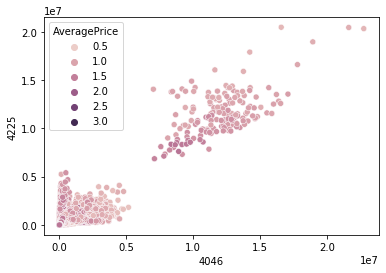

In [45]:
# Compare between 4046 and 4225 based on Average Price using scatter plot
sns.scatterplot(df['4046'],df['4225'],hue=df['AveragePrice'])

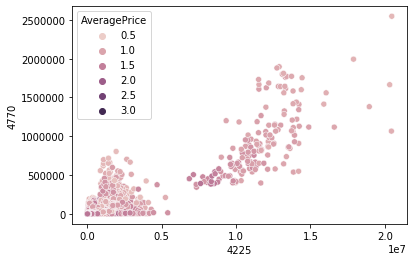

In [46]:
#Compare between 4225 and 4770 based on AveragePrice using scatterplot
sns.scatterplot(df['4225'],df['4770'],hue=df['AveragePrice'])

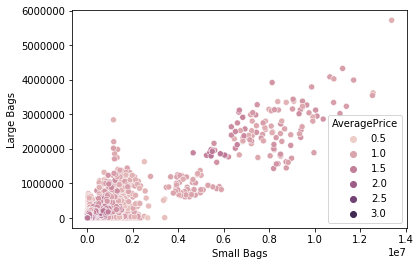

In [47]:
#Compare between Small Bags and Large Bags based on AveragePrice using scatterplot
sns.scatterplot(df['Small Bags'],df['Large Bags'],hue=df['AveragePrice'])

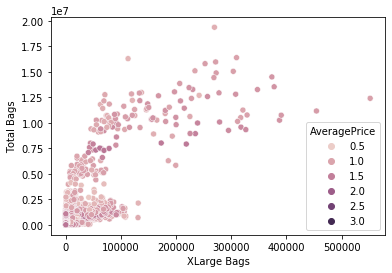

In [48]:
# Compare between XLarge Bags and Total Bags based on AveragePrice using scatterplot
sns.scatterplot(df['XLarge Bags'],df['Total Bags'],hue=df['AveragePrice'])

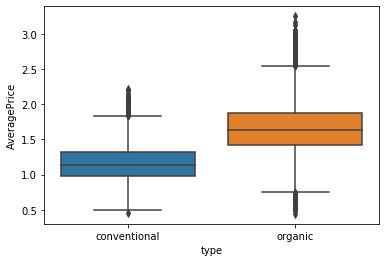

In [49]:
#There are 2 type Conventional and Organic. 
sns.boxplot(x='type',y='AveragePrice',data=df)

In [50]:
#Checking the count of Types
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

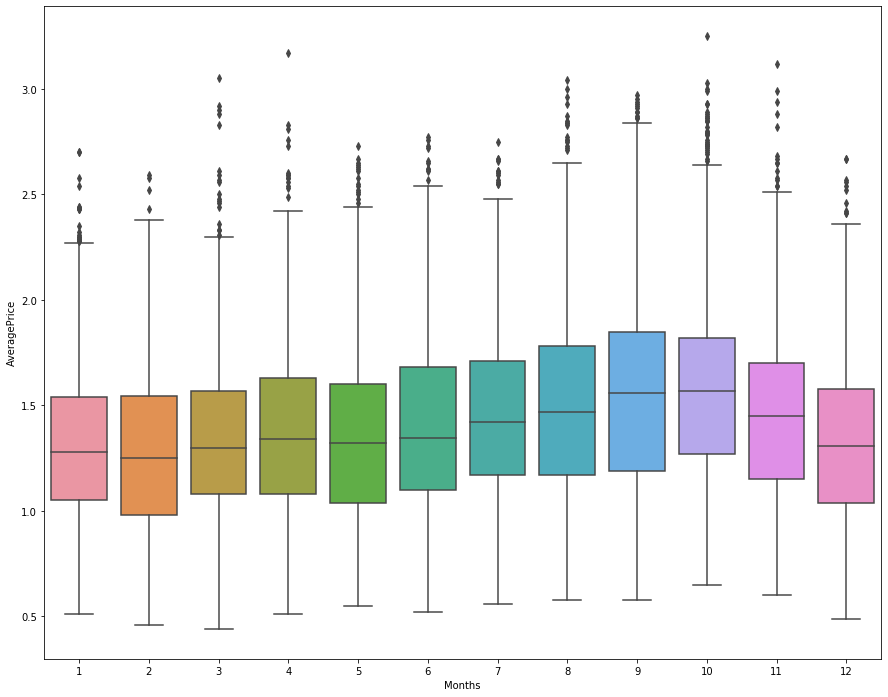

In [51]:
#Checking the Average Price on Months
plt.figure(figsize=(15,12))
sns.boxplot(x='Months',y='AveragePrice',data=df)

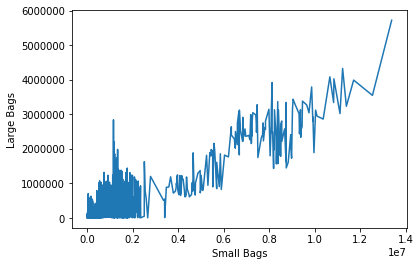

In [52]:
sns.lineplot(x='Small Bags',y='Large Bags',data=df)

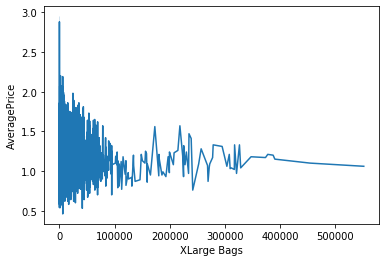

In [53]:
sns.lineplot(x='XLarge Bags',y='AveragePrice',data=df)

In [54]:
#Checking the count in year
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In 2017 the count is high, more sell happen in the year of 2017

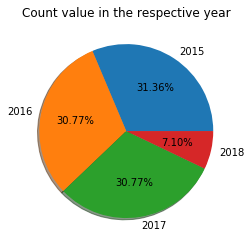

In [55]:

label='2015','2016','2017','2018'
figure,ax=plt.subplots()
ax.pie(df['Year'].value_counts(),labels=label,autopct='%1.2f%%', shadow=True)
plt.title("Count value in the respective year")
plt.show()

In [56]:
#Checking the count of Types
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

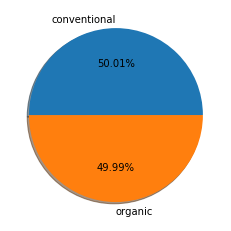

In [57]:
label='conventional','organic'
figure,ax=plt.subplots()
ax.pie(df['type'].value_counts(),labels=label,autopct='%1.2f%%',shadow=True)
plt.show()

It is showing mostly half organic type and half conventional type

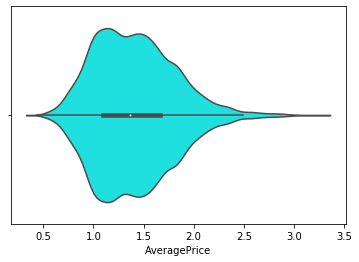

In [58]:
sns.violinplot(df['AveragePrice'],color='aqua')

<Figure size 1440x1800 with 0 Axes>

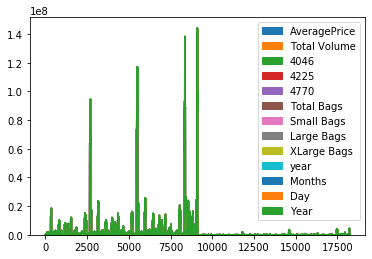

In [59]:
#Checking the Area of each features using area plot
plt.figure(figsize=(20,25))
df.plot.area()

# Mulitvariate Analysis

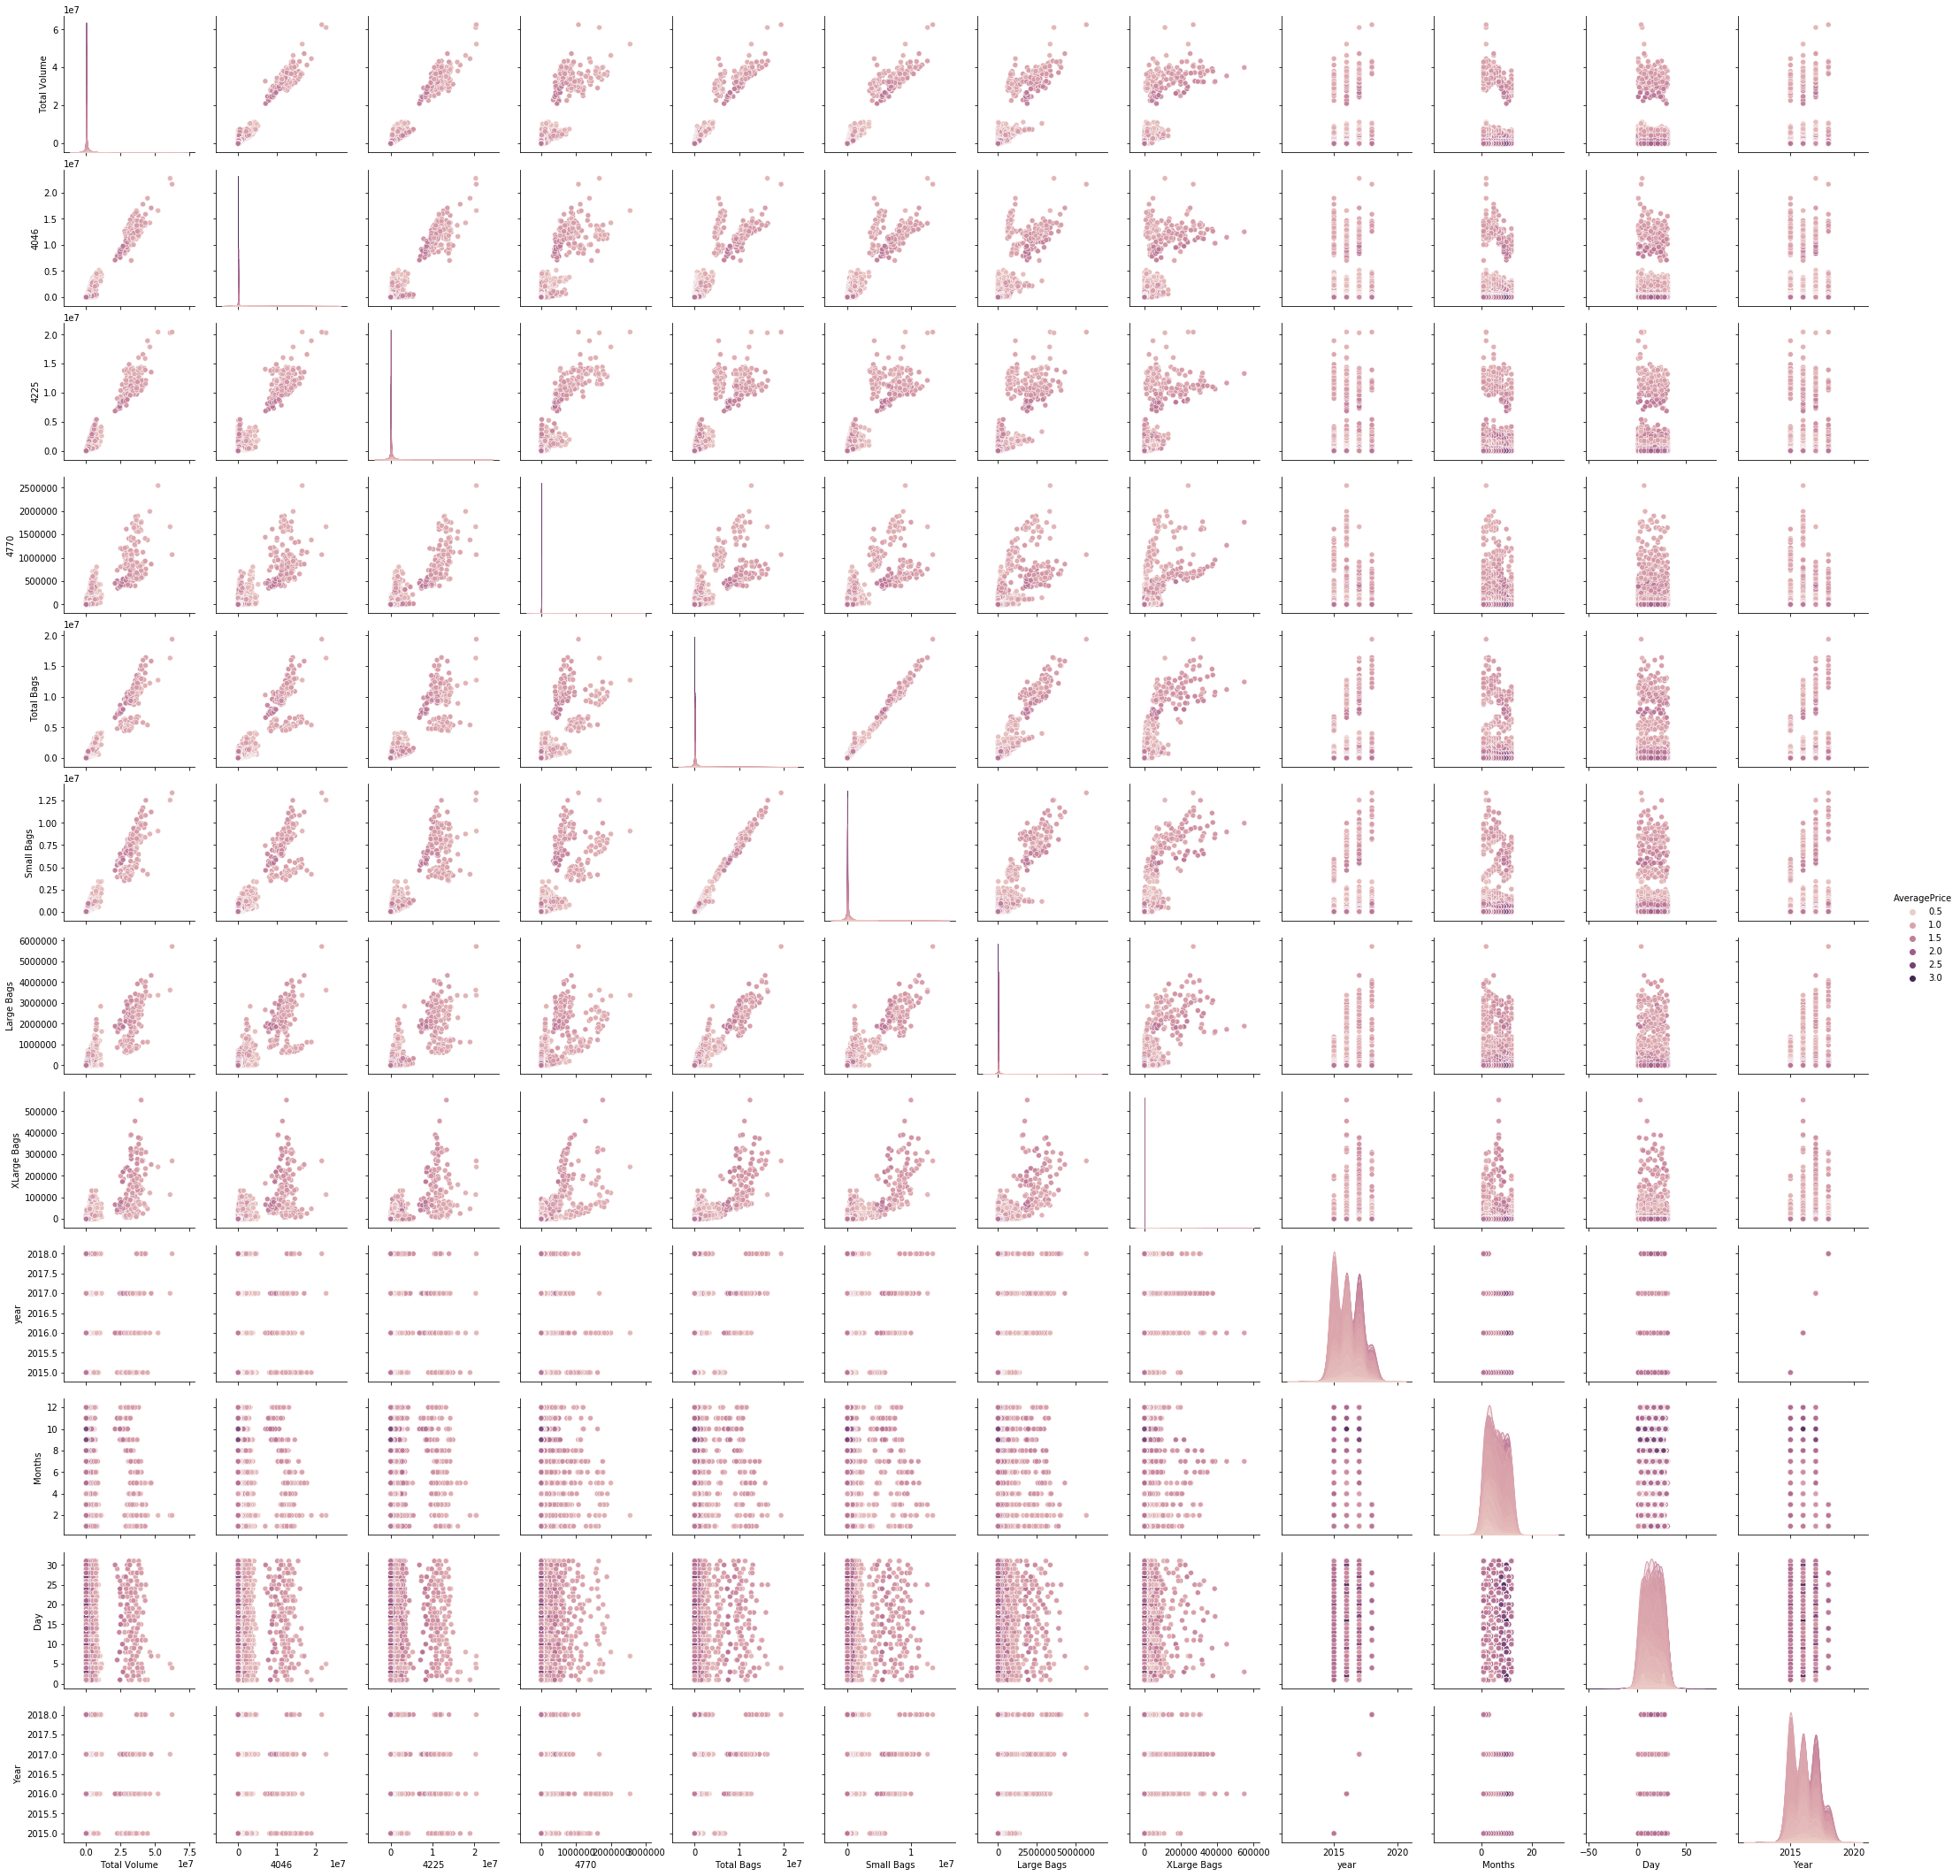

In [60]:
sns.pairplot(df,hue='AveragePrice')

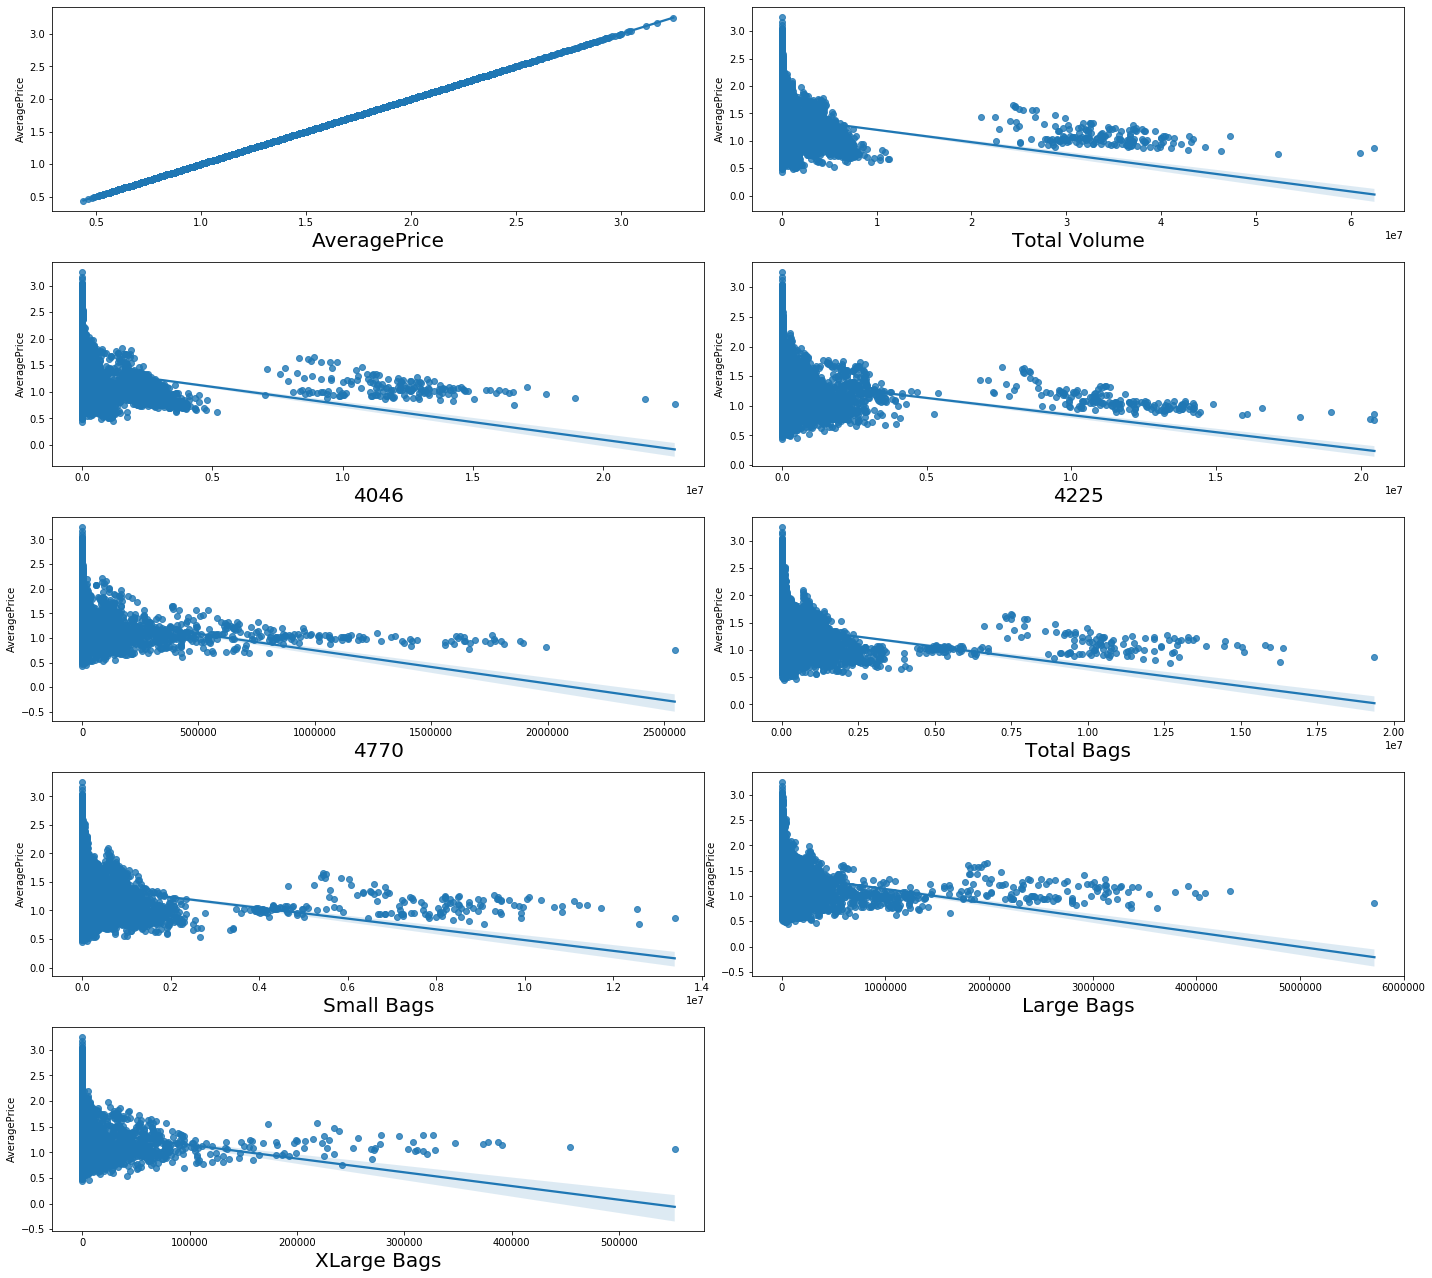

In [61]:
#Viewing the data using regression plot
plt.figure(figsize=(20,35))
plotnumber=1

for column in df[continuous_data]:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.regplot(df[column],df['AveragePrice'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

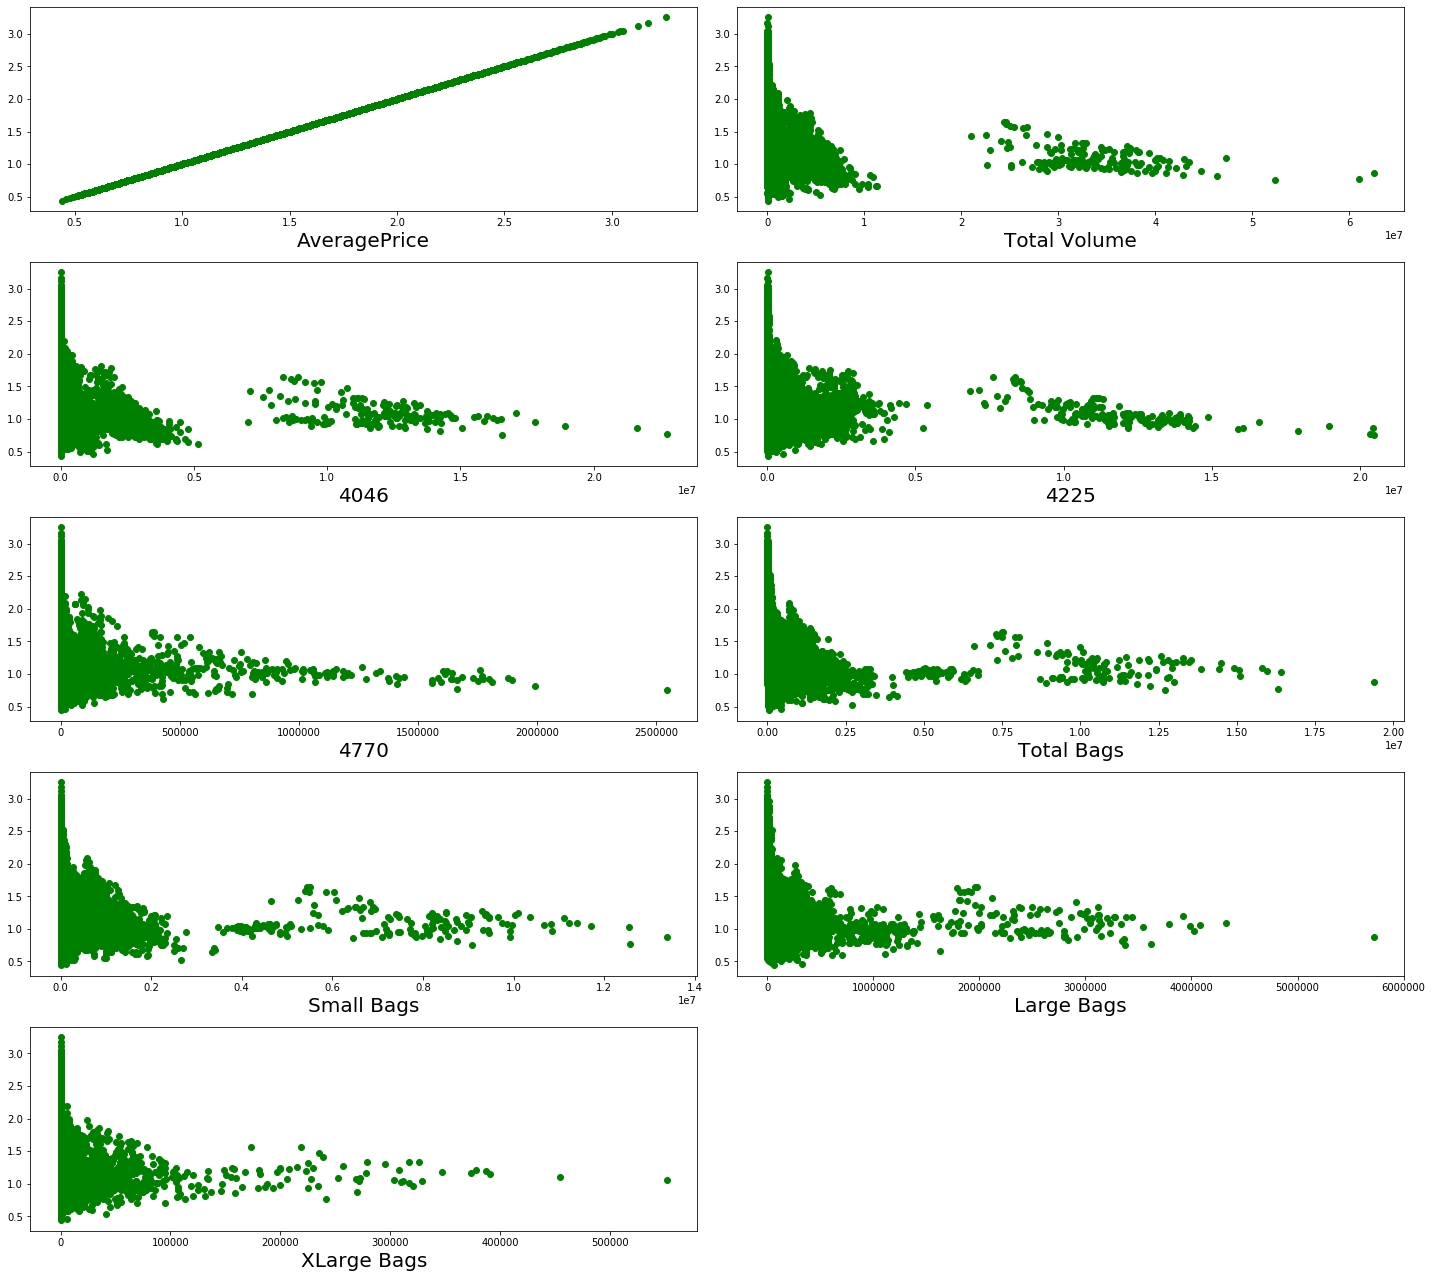

In [62]:
#Viewing the data using scatterplot
plt.figure(figsize=(20,35))
plotnumber=1

for column in df[continuous_data]:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        plt.scatter(df[column],df['AveragePrice'],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

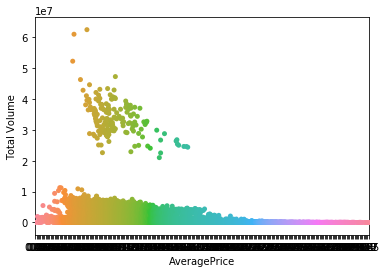

In [63]:
sns.swarmplot(x='AveragePrice',y='Total Volume',data=df)

AveragePrice       AxesSubplot(0.125,0.816017;0.352273x0.0639831)
Total Volume    AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
4046               AxesSubplot(0.125,0.739237;0.352273x0.0639831)
4225            AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
4770               AxesSubplot(0.125,0.662458;0.352273x0.0639831)
Total Bags      AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
Small Bags         AxesSubplot(0.125,0.585678;0.352273x0.0639831)
Large Bags      AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
XLarge Bags        AxesSubplot(0.125,0.508898;0.352273x0.0639831)
year            AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
Months             AxesSubplot(0.125,0.432119;0.352273x0.0639831)
Day             AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
Year               AxesSubplot(0.125,0.355339;0.352273x0.0639831)
dtype: object

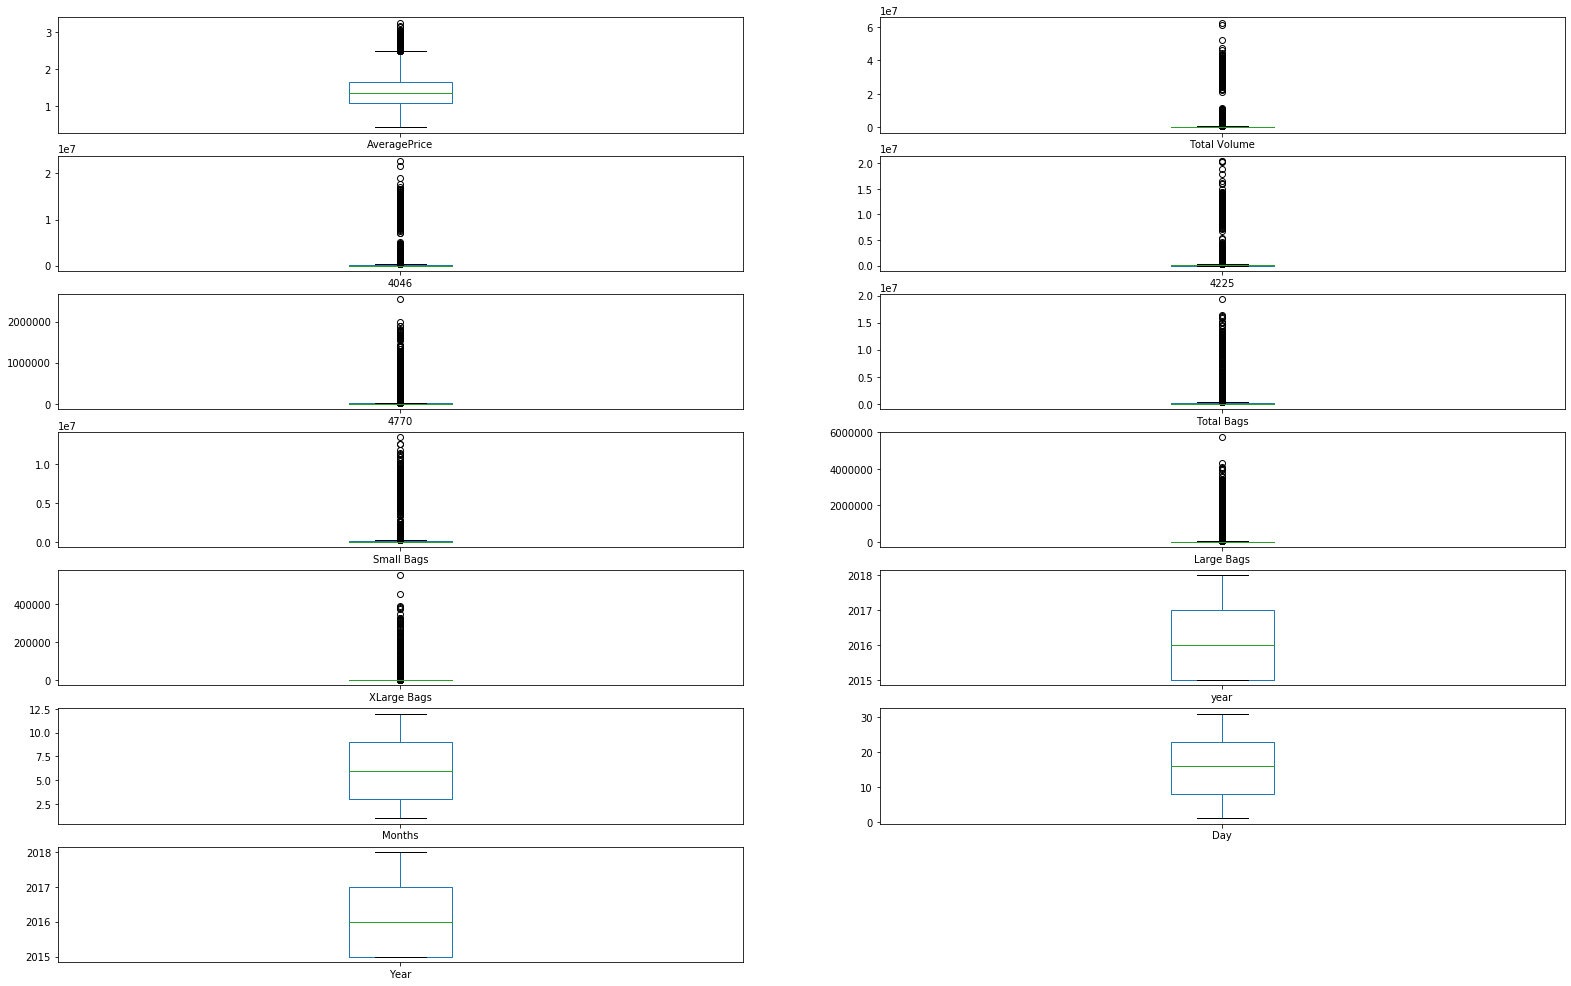

In [64]:
#Checking the Outliers using boxplots
df.plot(kind='box',subplots=True,layout=(10,2),figsize=(27,25))

Lots of Outliers are present in the data, lets remove the Outliers using the ZScore method

In [65]:
from scipy.stats import zscore

In [66]:
#Taken only continuous data
outliers=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(outliers))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.23156838, 0.22233464,
        0.17557961],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.23164379, 0.22256082,
        0.17557961],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [67]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,2018


In [68]:
df_new.shape

(17651, 15)

In [69]:
df.shape

(18249, 15)

In [70]:
data_loss=((18249-17651)/18249)*100
data_loss

3.276891884486821

3.2% data loss in the process of removing the Outliers

In [71]:
# Checking the Skewness
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Months          0.107408
Day             0.011778
Year            0.229976
dtype: float64

Skewness is present is most of the columns except AveragePrice, Year, Months, Day don't have skewness. Let's remove the skewness using Power Transformer

In [72]:
# Removing Skewness

skewed_data=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [73]:
from sklearn.preprocessing import PowerTransformer

scaled=PowerTransformer(method='yeo-johnson')

In [74]:
df_new[skewed_data]=scaled.fit_transform(df_new[skewed_data])
df_new[skewed_data]

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


In [75]:
df_new[skewed_data].value_counts()

Total Volume  4046       4225       4770       Total Bags  Small Bags  Large Bags  XLarge Bags
-2.992375     -1.963407  -2.306132  -1.228986  -2.316082   -1.857573   -1.389046   -0.677919      1
 0.556426      0.545340   0.696322   0.012927   0.536277    0.650738    0.215676   -0.677919      1
 0.556727      0.370094   0.459136   0.527655   0.858075    0.948474    0.607297   -0.677919      1
 0.556714      0.680009   0.600916   0.679576   0.534118    0.606296    0.247315    1.664486      1
 0.556662      0.616243   0.689413   0.970389   0.432693    0.573631   -1.492374   -0.677919      1
                                                                                                 ..
-0.627846      0.205095  -1.142445  -0.873700  -1.495366   -1.182915   -1.624482   -0.677919      1
-0.627708      0.035072  -0.382056  -1.228986  -1.564709   -1.241056   -1.624482   -0.677919      1
-0.627584     -1.094874  -1.545295  -0.693061  -0.189748   -0.022227   -1.153089   -0.677919      1
-0.62

In [76]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.229976
Months          0.107408
Day             0.011778
Year            0.229976
dtype: float64

Skewness has been removed

# Label Encoder

Type and Region is categorical data, let's change it to numberical data using Label Encoder

In [77]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Months', 'Day', 'Year'],
      dtype='object')

In [78]:
from sklearn.preprocessing import LabelEncoder

column=['type','region']

le=LabelEncoder()
df[column]=df[column].apply(le.fit_transform)

In [79]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29,2015


In [80]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [81]:
df['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

In [82]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14,2018


### Checking Correlation after data cleaning

In [83]:
# Checking the correlation after removing the Outliers and Skewness

df_corr=df.corr()
df_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Months,Day,Year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319,0.081033
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013,-0.000032


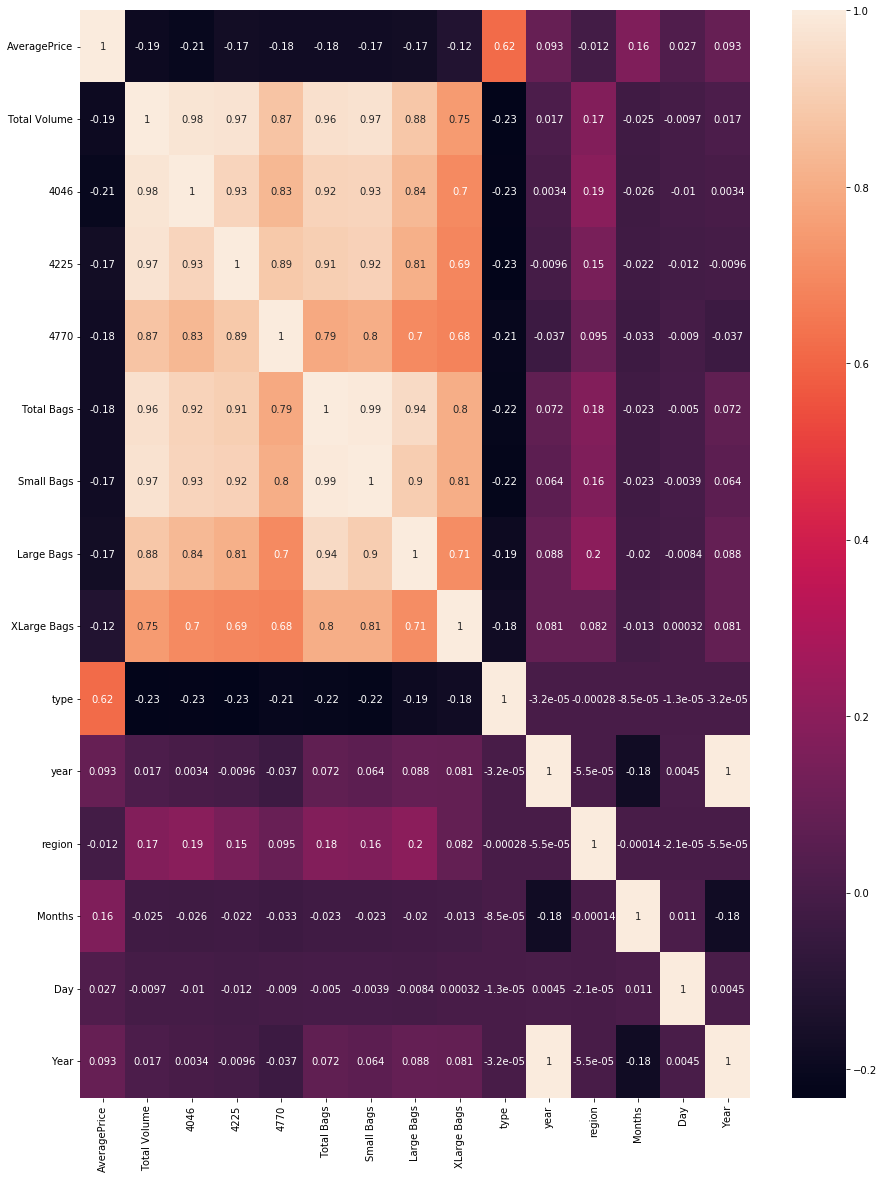

In [84]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0)
plt.show()

In [85]:
# Let's drop the day and region
df_new=df.drop(columns=['Day','region'],axis=1)
df_new.shape

(18249, 13)

In [86]:
df_new.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Months,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,2015


Day and region column has been dropped from the data set

In [87]:
df_new=df_new.drop(columns=['year','Year'],axis=1)
df_new.shape

(18249, 11)

In [88]:
# Splitting the data into x and y variable

x=df_new.drop(columns='AveragePrice')
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Months
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,11
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,1


In [89]:
y=df_new['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# Scaling the data

In [90]:
scaler=StandardScaler()
scaler

StandardScaler()

In [91]:
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-0.22771641 -0.23081597 -0.1999022  ... -0.17557961 -0.99983562
   1.64763162]
 [-0.23042664 -0.23110251 -0.20805446 ... -0.17557961 -0.99983562
   1.64763162]
 [-0.21208462 -0.23100731 -0.1544779  ... -0.17557961 -0.99983562
   1.64763162]
 ...
 [-0.24233073 -0.2306933  -0.24309014 ... -0.17557961  1.00016441
  -1.46495942]
 [-0.24162464 -0.2304279  -0.24265143 ... -0.17557961  1.00016441
  -1.46495942]
 [-0.24125273 -0.22934712 -0.24317042 ... -0.17557961  1.00016441
  -1.46495942]]


# Variance Inflation Factor

In [92]:
# Variance Inflation Factor

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,Total Volume,4.914107e+09
1,4046,6.593019e+08
2,4225,5.973816e+08
3,4770,4.758265e+06
4,Total Bags,2.370316e+14
5,Small Bags,1.364727e+14
6,Large Bags,1.448103e+13
7,XLarge Bags,7.621787e+10
8,type,1.060220e+00
9,Months,1.002201e+00


In [93]:
vif.sort_values('VIF',ascending=False)

,Features,VIF
4,Total Bags,2.370316e+14
5,Small Bags,1.364727e+14
6,Large Bags,1.448103e+13
7,XLarge Bags,7.621787e+10
0,Total Volume,4.914107e+09
1,4046,6.593019e+08
2,4225,5.973816e+08
3,4770,4.758265e+06
8,type,1.060220e+00
9,Months,1.002201e+00


In year and Year it is showing infinity let drop the column

# Priniciple Component Analysis

In [94]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [95]:
pca.fit_transform(x_scaled)

array([[-5.30250313e-01,  1.74208663e+00, -8.81437814e-01, ...,
         5.95639789e-03, -1.57227870e-07,  1.98544635e-09],
       [-5.33553073e-01,  1.74207988e+00, -8.81535733e-01, ...,
         2.23354514e-04, -1.67479408e-07,  2.00138409e-09],
       [-5.08399395e-01,  1.74212996e+00, -8.80464686e-01, ...,
         3.31052836e-02, -1.18807569e-07,  1.88571724e-09],
       ...,
       [-7.13961172e-01, -1.56061286e+00,  7.76126626e-01, ...,
         1.88067206e-03, -8.56502812e-07, -6.79069870e-10],
       [-7.12072249e-01, -1.56060463e+00,  7.76332619e-01, ...,
         4.24749814e-04, -8.62215163e-07, -6.82086996e-10],
       [-7.12391121e-01, -1.56053375e+00,  7.76421433e-01, ...,
         1.52773929e-04, -8.64542536e-07, -6.81081582e-10]])

# Splitting the data into training and testing

In [96]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=22,random_state=99)

In [97]:
train_x.shape

(18227, 10)

In [98]:
test_x.shape

(22, 10)

In [99]:
train_y.shape

(18227,)

In [100]:
test_y.shape

(22,)

# Model Building

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

### Linear Regression

In [102]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [103]:
lr_pred=lr.predict(test_x)
print("Predicted Value:\n",lr_pred)

Predicted Value:
 [1.11509852 1.70504697 1.75949678 1.61425111 1.74083697 1.06087951
 1.66874026 1.61507179 1.54416105 1.06920381 1.20076817 1.12645892
 1.17034023 1.68695527 1.14017005 1.57882776 1.75973908 1.59637567
 1.21441851 1.27613969 1.23971581 1.07283943]


In [104]:
#Checking the score for training the data
lr.score(train_x,train_y)

0.4232554253429166

In [105]:
#Checking the score for testing the data
lr.score(test_x,test_y)

0.29625647820682743

In [106]:
#Checking the coefficient
lr.coef_

array([-1.52833353e+02,  5.58614531e+01,  5.34078737e+01,  4.71043783e+00,
       -1.05763216e+04,  8.03496006e+03,  2.62702060e+03,  1.90546940e+02,
        2.44534459e-01,  6.39817960e-02])

In [107]:
#Checking the Intercept
lr.intercept_

1.406002824009632

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [109]:
print("The r2 score value is:",r2_score(test_y,lr_pred))
print("Mean Squared error value is:",mean_squared_error(test_y,lr_pred))
print("Mean Absolute error value is:",mean_absolute_error(test_y,lr_pred))

The r2 score value is: 0.29625647820682743
Mean Squared error value is: 0.0538004652333176
Mean Absolute error value is: 0.18588245333322242


# Decision Tree Regressor

In [110]:
dtc=DecisionTreeRegressor()
dtc.fit(train_x,train_y)

DecisionTreeRegressor()

In [111]:
dtc_pred=dtc.predict(test_x)
print("Predicted Value:\n",dtc_pred)

Predicted Value:
 [1.01 1.49 1.94 2.06 1.27 0.87 1.77 1.57 1.22 1.64 1.42 1.16 1.55 2.13
 1.06 1.54 1.05 1.76 1.49 1.07 1.13 1.06]


In [112]:
dtc.score(train_x,train_y)

1.0

In [113]:
dtc.score(test_x,test_y)

0.3032190760865161

In [114]:

print("Mean Squared error value is:",mean_squared_error(test_y,dtc_pred))
print("Mean Absolute error value is:",mean_absolute_error(test_y,dtc_pred))
print("The r2 score value is:",r2_score(test_y,dtc_pred))

Mean Squared error value is: 0.053268181818181805
Mean Absolute error value is: 0.1640909090909091
The r2 score value is: 0.3032190760865161


# Random Forest Regressor

In [115]:
rbr=RandomForestRegressor(n_estimators=100,random_state=50)
rbr.fit(train_x,train_y)

RandomForestRegressor(random_state=50)

In [116]:
rbr_pred=rbr.predict(test_x)
print("Predicted Value:\n",rbr_pred)

Predicted Value:
 [1.066  1.4255 1.8556 1.6585 1.3983 1.0632 1.6411 1.5277 1.2343 1.1844
 1.3993 1.1637 1.4636 1.8691 1.0771 1.5032 1.5027 1.735  1.3766 1.3272
 1.1157 1.1133]


In [117]:
print("Mean Squared error value is:",mean_squared_error(test_y,rbr_pred))
print("Mean Absolute error value is:",mean_absolute_error(test_y,rbr_pred))
print("The r2 score value is:",r2_score(test_y,rbr_pred))

Mean Squared error value is: 0.022179682272727284
Mean Absolute error value is: 0.11527727272727278
The r2 score value is: 0.7098759713847891


# KNeighborsRegressor

In [118]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [119]:
knn_pred=knn.predict(test_x)
print("Predicted Value:\n",knn_pred)

Predicted Value:
 [1.12333333 1.51333333 1.82666667 1.73       1.43666667 1.11666667
 1.42666667 1.58       1.35666667 1.04666667 1.40333333 1.13666667
 1.55333333 1.75333333 1.09333333 1.42666667 1.30666667 1.85333333
 1.57666667 1.54       0.92       1.04666667]


In [120]:
print("Mean Squared error value is:",mean_squared_error(test_y,knn_pred))
print("Mean Absolute error value is:",mean_absolute_error(test_y,knn_pred))
print("The r2 score value is:",r2_score(test_y,knn_pred))

Mean Squared error value is: 0.014037878787878788
Mean Absolute error value is: 0.08378787878787877
The r2 score value is: 0.8163758210297116


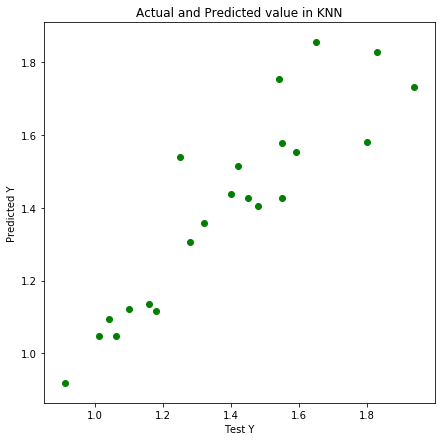

In [121]:
plt.figure(figsize=(7,7))
plt.scatter(x=test_y,y=knn_pred,color='green')
plt.xlabel("Test Y")
plt.ylabel("Predicted Y")
plt.title("Actual and Predicted value in KNN")
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier

# Making Prediction for Region

In [123]:
x_cl=df.drop(columns=["region","Day","Year","Months"],axis=1)
x_cl.shape

(18249, 11)

In [124]:
x_cl=x_cl.drop("year",axis=1)
x_cl.shape

(18249, 10)

In [125]:

y_cl=df['region']
print(y_cl.shape)

(18249,)


In [127]:
# Scaling the data
sc=StandardScaler()
sc_scaled=sc.fit_transform(x_cl)
sc_scaled

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.22235202,
        -0.17557961, -0.99983562],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.22233464,
        -0.17557961, -0.99983562],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.22231148,
        -0.17557961, -0.99983562],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ..., -0.22256082,
        -0.17557961,  1.00016441],
       [ 1.30138182, -0.24162464, -0.2304279 , ..., -0.2225293 ,
        -0.17557961,  1.00016441],
       [ 0.53151208, -0.24125273, -0.22934712, ..., -0.22262764,
        -0.17557961,  1.00016441]])

In [128]:
train_xcl,test_xcl,train_ycl,test_ycl=train_test_split(sc_scaled,y_cl,test_size=.33,random_state=80)

# KNeighborsClassifier

In [129]:
knc=KNeighborsClassifier(n_neighbors=2)
knc.fit(train_xcl,train_ycl)

KNeighborsClassifier(n_neighbors=2)

In [130]:
knc_pred=knc.predict(test_xcl)
knc_pred

array([10,  1,  2, ..., 39, 29,  4])

In [131]:
score=cross_val_score(knc,x_cl,y_cl,cv=50,scoring='accuracy').mean()
print("Cross Validation score is:",score)
print("Mean score value is:",score.mean())
print("Standard Deviation score value is:",score.std())

Cross Validation score is: 0.5944380550955892
Mean score value is: 0.5944380550955892
Standard Deviation score value is: 0.0


In [132]:
print("Accuracy Score",accuracy_score(test_ycl,knc_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,knc_pred))
print("Classification Report\n",classification_report(test_ycl,knc_pred))

Accuracy Score 0.520836792296198
Confusion Matrix
 [[ 84   0   0 ...   0   0   0]
 [  0  64   3 ...   0   0   0]
 [  0   1  79 ...   0   0   1]
 ...
 [  0   0   0 ... 116   0   0]
 [  0   0   0 ...   1  76   0]
 [  2   5   2 ...   0   0  37]]
Classification Report
               precision    recall  f1-score   support

           0       0.44      0.67      0.53       125
           1       0.40      0.55      0.47       116
           2       0.54      0.64      0.59       124
           3       0.36      0.54      0.43       116
           4       0.36      0.57      0.44        93
           5       0.33      0.52      0.41       111
           6       0.88      0.78      0.82       117
           7       0.37      0.51      0.42        97
           8       0.79      0.79      0.79       111
           9       0.48      0.57      0.52       111
          10       0.22      0.39      0.28       108
          11       0.60      0.77      0.68       119
          12       0.53      0.

In [133]:
pred_prob=knc.predict_proba(test_xcl)
pred_prob

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

# Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(train_xcl,train_ycl)

DecisionTreeClassifier()

In [135]:
dtc_pred=dtc.predict(test_xcl)
print("Predicted Value:",dtc_pred)

Predicted Value: [44 36 30 ... 39 29 42]


In [136]:
print("Accuracy Score",accuracy_score(test_ycl,dtc_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,dtc_pred))
print("Classification Report\n",classification_report(test_ycl,dtc_pred))

Accuracy Score 0.7803420222480492
Confusion Matrix
 [[ 83   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   2]
 [  0   0 110 ...   0   0   3]
 ...
 [  0   0   0 ... 114   0   0]
 [  0   0   0 ...   1  86   1]
 [  0   0   0 ...   0   0  74]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       125
           1       0.74      0.70      0.72       116
           2       0.85      0.89      0.87       124
           3       0.75      0.74      0.75       116
           4       0.81      0.86      0.83        93
           5       0.68      0.69      0.68       111
           6       0.94      0.88      0.91       117
           7       0.74      0.77      0.75        97
           8       0.96      0.89      0.93       111
           9       0.86      0.76      0.80       111
          10       0.75      0.67      0.71       108
          11       0.85      0.88      0.86       119
          12       0.79      0

In [137]:
score=cross_val_score(dtc,x_cl,y_cl,cv=50,scoring='accuracy').mean()
print("Cross Validation score is:",score)
print("Mean score value is:",score.mean())
print("Standard Deviation score value is:",score.std())

Cross Validation score is: 0.7354380550955893
Mean score value is: 0.7354380550955893
Standard Deviation score value is: 0.0


# Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

rbc=RandomForestClassifier(n_estimators=100,random_state=75)
rbc.fit(train_xcl,train_ycl)

RandomForestClassifier(random_state=75)

In [139]:
rbc_pred=rbc.predict(test_xcl)
print("Predicted Value:",rbc_pred)

Predicted Value: [44 36 30 ... 39 29 42]


In [140]:
print("Accuracy Score",accuracy_score(test_ycl,rbc_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,rbc_pred))
print("Classification Report\n",classification_report(test_ycl,rbc_pred))

Accuracy Score 0.8784658807903039
Confusion Matrix
 [[109   0   0 ...   0   0   0]
 [  0  97   0 ...   0   0   0]
 [  0   0 120 ...   0   0   0]
 ...
 [  0   0   0 ... 116   0   0]
 [  0   0   0 ...   2  98   0]
 [  0   1   1 ...   0   0  80]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.81      0.84      0.82       116
           2       0.94      0.97      0.95       124
           3       0.89      0.82      0.85       116
           4       0.83      0.94      0.88        93
           5       0.80      0.77      0.79       111
           6       0.97      0.97      0.97       117
           7       0.83      0.89      0.86        97
           8       0.98      0.99      0.99       111
           9       0.91      0.86      0.89       111
          10       0.87      0.83      0.85       108
          11       0.93      0.96      0.94       119
          12       0.91      0

In [141]:
score=cross_val_score(rbc,x_cl,y_cl,cv=50,scoring='accuracy').mean()
print("Cross Validation score is:",score)
print("Mean score value is:",score.mean())
print("Standard Deviation score value is:",score.std())

Cross Validation score is: 0.8527580912238447
Mean score value is: 0.8527580912238447
Standard Deviation score value is: 0.0


# Ensemble Technique

# AdaBoost Classifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(train_xcl,train_ycl)

AdaBoostClassifier()

In [143]:
ada_pred=ada.predict(test_xcl)
print("Predicted Value:",ada_pred)

Predicted Value: [ 7 32  2 ...  7  7 42]


In [144]:
print("Accuracy Score",accuracy_score(test_ycl,ada_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,ada_pred))
print("Classification Report\n",classification_report(test_ycl,ada_pred))

Accuracy Score 0.0815208367922962
Confusion Matrix
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0 61 ...  1  0  0]
 ...
 [ 0  0 25 ... 76  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  4  0  0]]
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.00      0.00      0.00       116
           2       0.15      0.49      0.23       124
           3       0.00      0.00      0.00       116
           4       0.08      0.18      0.11        93
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00       117
           7       0.05      0.99      0.09        97
           8       0.00      0.00      0.00       111
           9       0.00      0.00      0.00       111
          10       0.00      0.00      0.00       108
          11       0.00      0.00      0.00       119
          12       0.00      0.00      0.00       106
          13

In [145]:
score=cross_val_score(ada,x_cl,y_cl,cv=50,scoring='accuracy').mean()
print("Cross Validation score is:",score)
print("Mean score value is:",score.mean())
print("Standard Deviation score value is:",score.std())

Cross Validation score is: 0.07518500677404788
Mean score value is: 0.07518500677404788
Standard Deviation score value is: 0.0


# GradientBoostingClassifier

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(train_xcl,train_ycl)

GradientBoostingClassifier()

In [179]:
gbc_pred=gbc.predict(test_xcl)
print("Predicted Value:",gbc_pred)

Predicted Value: [44 36 30 ... 39 29 42]


In [180]:
print("Accuracy Score",accuracy_score(test_ycl,gbc_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,gbc_pred))
print("Classification Report\n",classification_report(test_ycl,gbc_pred))

Accuracy Score 0.8155404283579611
Confusion Matrix
 [[105   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   1]
 [  0   0 108 ...   0   0   1]
 ...
 [  0   0   0 ... 116   0   0]
 [  0   0   0 ...   1  96   0]
 [  0   1   1 ...   0   0  75]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       125
           1       0.77      0.74      0.76       116
           2       0.92      0.87      0.89       124
           3       0.81      0.72      0.76       116
           4       0.78      0.86      0.82        93
           5       0.72      0.76      0.74       111
           6       0.95      0.90      0.93       117
           7       0.71      0.84      0.77        97
           8       1.00      0.97      0.99       111
           9       0.87      0.77      0.82       111
          10       0.69      0.75      0.72       108
          11       0.81      0.83      0.82       119
          12       0.87      0

In [181]:
score=cross_val_score(gbc,x_cl,y_cl,cv=2,scoring='accuracy')
print("Cross Validation score is:",score)
print("Mean score value is:",score.mean())
print("Standard Deviation score value is:",score.std())

Cross Validation score is: [0.03353425 0.01961859]
Mean score value is: 0.026576417456895256
Standard Deviation score value is: 0.006957829118447207


In [182]:
for clf in (knc,dtc,rbc,ada,gbc):
    clf.fit(train_xcl,train_ycl)
    clf_pred=clf.predict(test_xcl)
    print(clf.__class__.__name__,accuracy_score(test_ycl,clf_pred))

KNeighborsClassifier 0.520836792296198
DecisionTreeClassifier 0.7766893574630582
RandomForestClassifier 0.8784658807903039
AdaBoostClassifier 0.0815208367922962
GradientBoostingClassifier 0.8150423377054624


In Gradient Boosting Classifier we got the highest score 81% which is a good score. We can take Gradient Boosting classifier as our final model. Let's do Hyper parameter tuning to see if we can improve the model accuracy.

# Hyper Parameter Tuning

In [165]:
grid_param={'learning_rate':[1.0,0.01],
            'max_depth':[3,5],
            'n_estimators':[10,20]
}

In [166]:
grid=GridSearchCV(estimator=gbc,param_grid=grid_param,verbose=3)

In [167]:
grid.fit(train_xcl,train_ycl)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.067 total time=  38.2s
[CV 2/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.105 total time=  38.6s
[CV 3/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.048 total time=  37.8s
[CV 4/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.084 total time=  37.7s
[CV 5/5] END learning_rate=1.0, max_depth=3, n_estimators=10;, score=0.084 total time=  37.9s
[CV 1/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.082 total time= 1.4min
[CV 2/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.092 total time= 1.4min
[CV 3/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.056 total time= 1.4min
[CV 4/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.084 total time= 1.4min
[CV 5/5] END learning_rate=1.0, max_depth=3, n_estimators=20;, score=0.086 total time= 1.4min


GridSearchCV(estimator=GradientBoostingClassifier(max_depth=5),
             param_grid={'learning_rate': [1.0, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [10, 20]},
             verbose=3)

In [169]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 20}

We got the best parameter. It has taken  lots of time to tune the paramter. So, I have given the less parameters to tune it.

In [177]:
final_model=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=20)
final_model.fit(train_xcl,train_ycl)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=20)

In [174]:
final_model_pred=final_model.predict(test_xcl)
print("Predicted Value:",final_model_pred)

Predicted Value: [44 36 30 ... 39 42 42]


In [175]:
print("Accuracy Score",accuracy_score(test_ycl,final_model_pred))
print("Confusion Matrix\n",confusion_matrix(test_ycl,final_model_pred))
print("Classification Report\n",classification_report(test_ycl,final_model_pred))

Accuracy Score 0.7006475178482484
Confusion Matrix
 [[ 82   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   5]
 [  0   0 107 ...   0   0   1]
 ...
 [  0   0   0 ... 113   0   0]
 [  0   1   0 ...   2  89   0]
 [  0   1   1 ...   0   0  76]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.66      0.69       125
           1       0.68      0.47      0.55       116
           2       0.84      0.86      0.85       124
           3       0.79      0.72      0.75       116
           4       0.69      0.72      0.71        93
           5       0.64      0.58      0.61       111
           6       0.95      0.89      0.92       117
           7       0.58      0.68      0.63        97
           8       0.98      0.88      0.93       111
           9       0.61      0.60      0.61       111
          10       0.55      0.44      0.49       108
          11       0.82      0.82      0.82       119
          12       0.77      0

# Saving the Model

In [183]:
import pickle
filename='Avocado.pickle'

In [184]:
pickle.dump(gbc,open(filename,'wb'))

In [185]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_xcl)

array([44, 36, 30, ..., 39, 29, 42])

In [187]:
loaded_model.score(train_xcl,train_ycl)

0.986749550139048

In [188]:
loaded_model.score(test_xcl,test_ycl)

0.8150423377054624

We got 98.6% score in training data and 81.5% score in testing data

In [193]:
DF=pd.DataFrame([loaded_model.predict(test_xcl)[:],test_ycl[:]],index=["Predicted","Actual"])
DF

,0,1,2,3,4,5,6,7,8,9,...,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022
Predicted,44,36,30,51,25,37,20,0,6,17,...,41,15,14,53,28,43,38,39,29,42
Actual,44,36,30,51,25,13,20,0,6,17,...,41,15,14,53,28,43,44,39,29,42


In [195]:
DF.to_csv("Avocado_Prediction.csv")

Here is the Acutal and Predicted Value Of Avacodo. We see there is only slight difference in Actual and Predicted value, most of the values are same. 

In this Avacado Project we evaluate the results with various model. We see in each year different sales counts, In 2015 the Avocado sales was high, most of the people buy avocado in 2015. The Average Price of each Avocado.The regions of Avocado sold. We used various plot to analyse the insight of each features. Conventional type of Avocado sold most than Oraganic type. We have check the correlation of each feature.   